In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Base de données IRIS

Sur le jeu de données suivant: 

    * extraire les données sur les dimensions des pétales
    * effectuer une CAH
    * utiliser la méthode K-Means
    * Comparer les méthode
    * peut-on dire que la classification est bonne comparée au numéro de l'espèce donné ?
    * effectuer une ACP
    * doit-on recommencer en excluant un groupe?


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/MT15/TP2 _ ACP/data/Iris.xlsx')  
df

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa
...,...,...,...,...,...,...
145,3,2.3,5.2,3.0,6.7,Verginica
146,3,1.9,5.0,2.5,6.3,Verginica
147,3,2.0,5.2,3.0,6.5,Verginica
148,3,2.3,5.4,3.4,6.2,Verginica


* extraire les données sur les dimensions des pétales

In [ ]:
print(df.shape)
fleur=df.iloc[:,1:5]
fleur

(150, 6)


,Petal_width,Petal_length,Sepal_width,Sepal_length
0,0.2,1.4,3.5,5.1
1,0.2,1.4,3.0,4.9
2,0.2,1.3,3.2,4.7
3,0.2,1.5,3.1,4.6
4,0.2,1.4,3.6,5.0
...,...,...,...,...
145,2.3,5.2,3.0,6.7
146,1.9,5.0,2.5,6.3
147,2.0,5.2,3.0,6.5
148,2.3,5.4,3.4,6.2


* effectuer une CAH

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fleur_cr = sc.fit_transform(fleur.values)

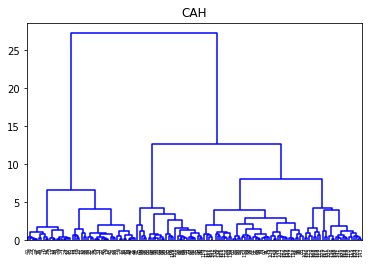

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# générer la matrice des liens
Z = linkage(fleur_cr,method='ward',metric='euclidean')
# affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=fleur.index,color_threshold=0)
plt.show()

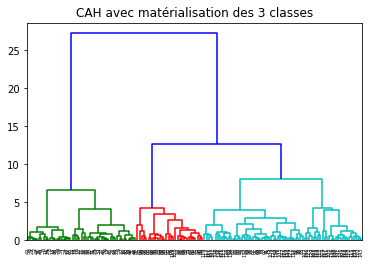

In [ ]:
plt.title('CAH avec matérialisation des 3 classes')
dendrogram(Z,labels=fleur.index,color_threshold=10)
plt.show()

In [ ]:
groupes_cah = fcluster(Z,t=10,criterion='distance')
print(groupes_cah)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [ ]:
fclass = pd.DataFrame({'fleur':fleur.index, 'classe':groupes_cah})
fclass

,fleur,classe
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
145,145,3
146,146,3
147,147,3
148,148,3


* utiliser la méthode K-Means

In [ ]:
# k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3)  # on choisit 3 avec l'étude du dessus
kmeans.fit(fleur_cr)

# Création d'un DataFrame avec les fromages et leurs indices de classe
fclass2 = pd.DataFrame({'fleur':fleur.index, 'classe':kmeans.labels_})
fclass2.sort_values(by=['classe'])

,fleur,classe
74,74,0
83,83,0
82,82,0
81,81,0
80,80,0
...,...,...
115,115,2
117,117,2
118,118,2
122,122,2


In [ ]:
fSpecies = pd.DataFrame({'fleur':fleur.index, 'classe':df["Species_No"]})
fSpecies

,fleur,classe
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
145,145,3
146,146,3
147,147,3
148,148,3


* Comparer les méthode

In [ ]:
# correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2
row_0,,,
1,0,49,0
2,29,1,0
3,24,0,47


Nous pouvons constater que pour les espèces 1 et 2, les résultats de ces deux classifications sont les mêmes, mais pour l'espèce 3, ils sont quelque peu différents

* peut-on dire que la classification est bonne comparée au numéro de l'espèce donné ?

In [ ]:
pd.crosstab(groupes_cah,df["Species_No"])

Species_No,1,2,3
row_0,,,
1,49,0,0
2,1,27,2
3,0,23,48


In [ ]:
GAPcah=(1+2+23)/150
GAPcah

0.17333333333333334

Pour methode de CAH, Nous avons remarqué que 17% des fleurs n'étaient pas divisées

In [ ]:
pd.crosstab(kmeans.labels_,df["Species_No"])

Species_No,1,2,3
row_0,,,
0,0,39,14
1,50,0,0
2,0,11,36


In [ ]:
GAPcah=(11+14)/150
GAPcah

0.16666666666666666

Pour methode de K-means, Nous avons remarqué que 17% des fleurs n'étaient pas divisées

la classification n'est trés bonne comparée au numéro de l'espèce donné 

* effectuer une ACP

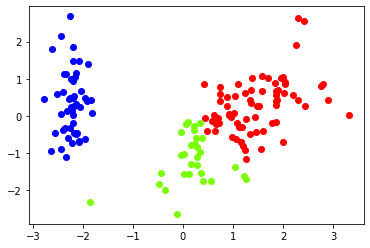

In [ ]:
# ACP for CAH

from sklearn.decomposition import PCA
coord = PCA(n_components=2).fit_transform(fleur_cr)

# projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen'],[3,1,2]):
    plt.scatter(coord[groupes_cah==k,0],coord[groupes_cah==k,1],c=couleur)
plt.show()

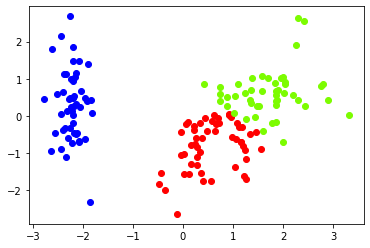

In [ ]:
# ACP for Kmeans

from sklearn.decomposition import PCA
coord = PCA(n_components=2).fit_transform(fleur_cr)

# projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen'],[0,1,2]):
    plt.scatter(coord[kmeans.labels_==k,0],coord[kmeans.labels_==k,1],c=couleur)
plt.show()

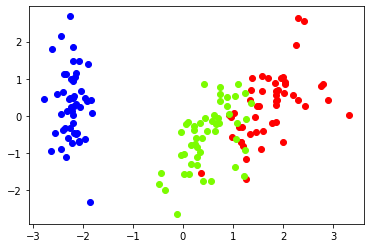

In [ ]:
# ACP for Species_No

from sklearn.decomposition import PCA
coord = PCA(n_components=2).fit_transform(fleur_cr)

# projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen'],[3,1,2]):
    plt.scatter(coord[df["Species_No"]==k,0],coord[df["Species_No"]==k,1],c=couleur)
plt.show()

* doit-on recommencer en excluant un groupe?

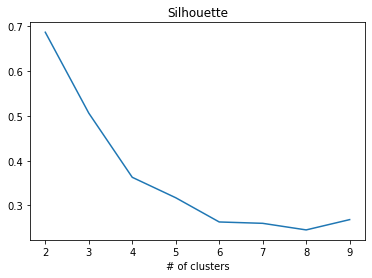

In [ ]:
# librairie pour évaluation des partitions
from sklearn import metrics

# utilisation de la métrique "silhouette"
# faire varier le nombre de clusters de 2 à 10
res = []
for k in range(2,10):
    km = cluster.KMeans(n_clusters=k)
    km.fit(fleur_cr)
    res.append(metrics.silhouette_score(fleur,km.labels_))

# graphique
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,10,1),res)
plt.show()

Nous avons trouvé qu'il serait préférable d'avoir 2 clusters, nous pourrions donc en exclure un

# Analyse d'une base de données de crédit bancaire

## Présentation de la base de données

__Le jeu de données contient 1000 entrées avec 20 variables. Dans cet ensemble de données, chaque entrée représente un individu qui prend un crédit auprès d'une banque.__

Nous utilisons les variables quantitatives uniquement, à savoir :

* Age : âge (numérique)
* Credit amount : montant du crédit (numérique)
* Duration : durée du crédit (numérique)

In [ ]:
# Import des données
data = pd.read_csv('/content/drive/MyDrive/MT15/TP5_Classification/data/data2_clustering.csv').iloc[:,1:]
data

,Age,Credit amount,Duration,Sex_cat,Job_cat,Housing_cat,Purpose_cat,Saving accounts_cat,Checking account_cat
0,67,1169,6,1,2,1,5,0,0
1,22,5951,48,0,2,1,5,0,1
2,49,2096,12,1,1,1,3,0,0
3,45,7882,42,1,2,0,4,0,0
4,53,4870,24,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,31,1736,12,0,1,1,4,0,0
996,40,3857,30,1,3,1,1,0,0
997,38,804,12,1,2,1,5,0,0
998,23,1845,45,1,2,0,5,0,0


## Enoncé

- Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir.
- Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
- Comparer les classes obtenues avec la CAH et les classes obtenues par K-means.
- Etudier les classes obtenues par K-means, analyser les propriétés des individus qui composent chacune des classes.
   

Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir.

In [ ]:
print(data.shape)
data1=data.iloc[:,0:3]
data1

(1000, 9)


,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_cr = sc.fit_transform(data1.values)

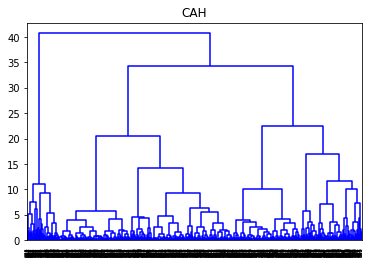

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# générer la matrice des liens
Z = linkage(data_cr,method='ward',metric='euclidean')
# affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=data.index,color_threshold=0)
plt.show()

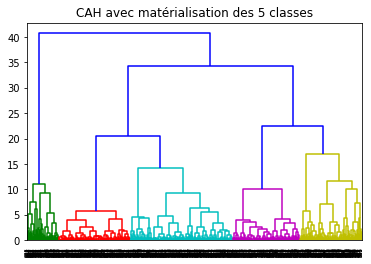

In [ ]:
plt.title('CAH avec matérialisation des 5 classes')
dendrogram(Z,labels=data.index,color_threshold=20)
plt.show()

Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH.

In [ ]:
# k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)  # on choisit 5 avec l'étude du dessus
kmeans.fit(data_cr)

# Création d'un DataFrame avec les fromages et leurs indices de classe
df2 = pd.DataFrame({'fromage':data.index, 'classe':kmeans.labels_})
df2.sort_values(by=['classe'])

,fromage,classe
670,670,0
739,739,0
863,863,0
245,245,0
737,737,0
...,...,...
714,714,4
57,57,4
812,812,4
236,236,4


Comparer les classes obtenues avec la CAH et les classes obtenues par K-means.

In [ ]:
# correspondance avec les groupes de la CAH
groupes_cah = fcluster(Z,t=20,criterion='distance')
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3,4
row_0,,,,,
1,2,0,41,0,51
2,5,211,0,0,0
3,228,38,37,2,0
4,0,111,0,90,0
5,36,0,40,105,3


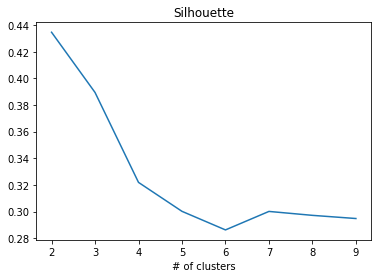

In [ ]:
# librairie pour évaluation des partitions
from sklearn import metrics

# utilisation de la métrique "silhouette"
# faire varier le nombre de clusters de 2 à 10
res = []
for k in range(2,10):
    km = cluster.KMeans(n_clusters=k)
    km.fit(data_cr)
    res.append(metrics.silhouette_score(data_cr,km.labels_))

# graphique
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,10,1),res)
plt.show()

Etudier les classes obtenues par K-means, analyser les propriétés des individus qui composent chacune des classes.

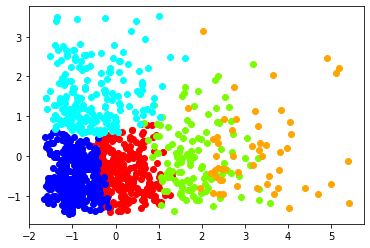

In [ ]:
# ACP

from sklearn.decomposition import PCA
coord = PCA(n_components=2).fit_transform(data_cr)

# projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua','orange'],[0,1,2,3,4]):
    plt.scatter(coord[kmeans.labels_==k,0],coord[kmeans.labels_==k,1],c=couleur)
plt.show()

In [ ]:
# centrer et réduire
data_subset_cr = sc.fit_transform(data1.values)
print(data_subset_cr)

[[ 2.76645648 -0.74513141 -1.23647786]
 [-1.19140394  0.94981679  2.24819436]
 [ 1.18331231 -0.41656241 -0.73866754]
 ...
 [ 0.21583532 -0.87450324 -0.73866754]
 [-1.10345149 -0.50552769  1.9992892 ]
 [-0.75164167  0.46245715  1.9992892 ]]


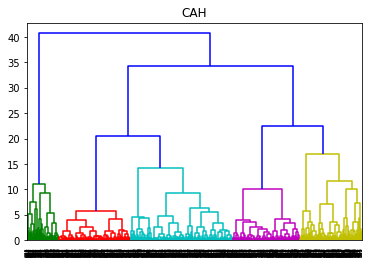

[5 3 4 5 5 1 5 1 5 3 2 3 2 5 2 3 5 1 1 3 4 4 4 4 2 4 4 4 4 5 3 3 3 4 4 3 1
 3 4 2 3 2 5 3 5 4 5 2 5 2 3 3 2 3 5 2 5 1 2 3 2 4 5 1 3 5 2 2 3 3 1 4 4 1
 5 5 3 5 1 3 5 4 2 5 4 2 2 1 3 2 4 4 4 3 4 1 5 3 3 5 3 3 2 4 2 1 5 3 1 3 2
 2 3 1 4 5 1 2 3 4 3 5 2 5 2 2 4 2 4 2 1 3 2 4 1 4 1 5 4 4 2 3 3 2 2 3 4 4
 3 4 4 4 3 1 5 2 4 4 5 4 3 3 3 5 3 4 3 2 3 3 3 2 3 4 3 5 4 4 2 5 1 3 3 5 3
 3 5 5 2 3 5 3 3 2 3 4 2 2 3 5 4 2 3 2 4 1 4 2 3 4 4 5 5 5 5 4 3 3 3 5 2 2
 2 3 3 3 1 5 2 3 3 4 4 2 4 3 1 5 4 5 3 4 3 2 4 3 4 4 3 2 4 4 3 3 2 1 3 2 2
 4 2 5 3 5 2 3 1 3 5 3 3 4 1 3 1 4 2 4 2 3 2 4 4 5 3 1 3 1 4 5 2 1 5 5 5 1
 2 4 5 3 4 5 3 4 1 4 3 4 2 2 1 3 3 2 2 3 4 5 4 2 3 3 3 2 3 4 5 3 3 2 5 3 1
 1 3 4 2 2 3 2 3 3 3 3 4 4 2 3 4 2 2 2 5 3 4 3 4 3 2 3 5 4 4 2 2 4 3 2 5 5
 5 3 2 1 1 1 3 4 1 4 3 1 3 2 3 2 2 5 2 2 3 2 5 2 4 1 5 5 4 3 3 2 1 2 5 3 5
 2 3 2 3 1 4 4 3 1 4 3 3 3 2 2 4 3 2 2 3 4 2 5 5 1 4 3 2 2 2 3 5 2 4 2 3 4
 3 4 3 4 4 5 1 2 4 3 3 3 4 4 2 3 5 3 4 4 3 5 3 1 3 3 3 2 2 4 3 3 3 3 4 4 2
 3 5 3 4 4 4 5 4 2 2 5 2 

In [ ]:
# générer la matrice des liens

Z_subset = linkage(data_subset_cr,method='ward',metric='euclidean')

# CAH et affichage du dendrogramme

plt.title("CAH")
dendrogram(Z_subset,labels=data.index,color_threshold=20)
plt.show()

# groupes

groupes_subset_cah = fcluster(Z_subset,t=20,criterion='distance')
print(groupes_subset_cah)

5


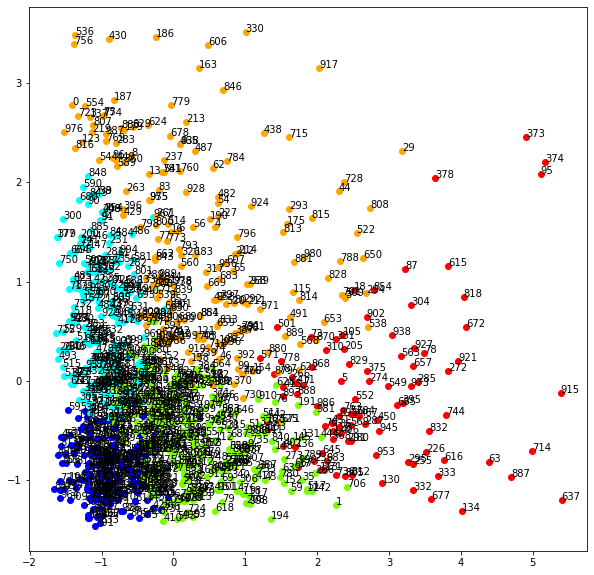

In [ ]:
# ACP 
count=0 
acp = PCA(n_components=2).fit_transform(data_subset_cr)
 # projeter dans le plan factoriel avec un code couleur selon le groupe
plt.figure(figsize=(10,10))
for couleur,k in zip(['red','blue','lawngreen','aqua','orange'],[1,2,3,4,5]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
    count+=1
print(count)

# mettre les labels des points
for i,label in enumerate(data.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()

Nous avons constaté qu'en examinant la contribution de chaque variable:

Le nombre de crédit contribue le plus à cet axe 1 et est positif.L'axe 1 représente la variation du nombre de crédit. Plus à droit,il plus élevé.

L'âge des individus contribue le plus à cet axe 2 et est positif.L'axe 2 représente la variation de l'âge des individus. Plus à bas, les individus sont plus jeunes.

Par conséquent, la classification bleue signifie que le nombre de crédits est relativement faible.Parmi eux, le bleu foncé est plus jeune que le bleu clair.Rouge est la personne avec le plus de crédit